Development Phase of the Project

In [7]:
# Libraries for data manipulation
import pandas as pd
import numpy as np

# Libraries for text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import string

# Libraries for vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Libraries for topic modeling
from sklearn.decomposition import LatentDirichletAllocation, NMF

# Libraries for visualizing
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary nltk packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
# Load the dataset
df = pd.read_excel('/content/Data.xlsx')



In [19]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Unnamed: 10,Unnamed: 11,x
0,101,B004K2IHUO,A1SYSKR79LA2CB,"Mycroft ""Virture is its own punishment""",4,5,5,1233014400,Taste wise it is a 6 star item,"The mouth says, ""How do I love thee, let me co...",NaN,NaN,NaN
1,102,B004K2IHUO,A3D1TXE98KRKYO,"Danny ""The Student""",2,3,4,1256515200,Great Support,Arrived slightly thawed. My parents wouldn't a...,NaN,NaN,NaN
2,103,B004K2IHUO,AVCA516CFZ9HF,S. Fowler,0,0,4,1335139200,TART!,The crust on these tarts are perfect. My husb...,NaN,NaN,NaN
3,104,B004K2IHUO,A1P21J0DMTVGS7,Lovethemovies,0,0,5,1332028800,Omaha Apple Tartlets,These are absolutely scrumptuous! My husband ...,NaN,NaN,NaN
4,105,B004K2IHUO,AL3E5V6MXO9B0,pionex1796,0,0,5,1326412800,Loved these Tartlets,What a nice alternative to an apple pie. Love ...,NaN,NaN,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      208 non-null    int64  
 1   ProductId               208 non-null    object 
 2   UserId                  208 non-null    object 
 3   ProfileName             208 non-null    object 
 4   HelpfulnessNumerator    208 non-null    int64  
 5   HelpfulnessDenominator  208 non-null    int64  
 6   Score                   208 non-null    int64  
 7   Time                    208 non-null    int64  
 8   Summary                 208 non-null    object 
 9   Text                    208 non-null    object 
 10  Unnamed: 10             0 non-null      float64
 11  Unnamed: 11             0 non-null      float64
 12  x                       0 non-null      float64
dtypes: float64(3), int64(5), object(5)
memory usage: 21.2+ KB


In [21]:
# Checking the data types and missing values
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      208 non-null    int64  
 1   ProductId               208 non-null    object 
 2   UserId                  208 non-null    object 
 3   ProfileName             208 non-null    object 
 4   HelpfulnessNumerator    208 non-null    int64  
 5   HelpfulnessDenominator  208 non-null    int64  
 6   Score                   208 non-null    int64  
 7   Time                    208 non-null    int64  
 8   Summary                 208 non-null    object 
 9   Text                    208 non-null    object 
 10  Unnamed: 10             0 non-null      float64
 11  Unnamed: 11             0 non-null      float64
 12  x                       0 non-null      float64
dtypes: float64(3), int64(5), object(5)
memory usage: 21.2+ KB
None
Id                          0
Pr

 Exploratory Data Analysis (EDA)
You can begin by exploring the dataset visually to get a better sense of patterns and distributions.

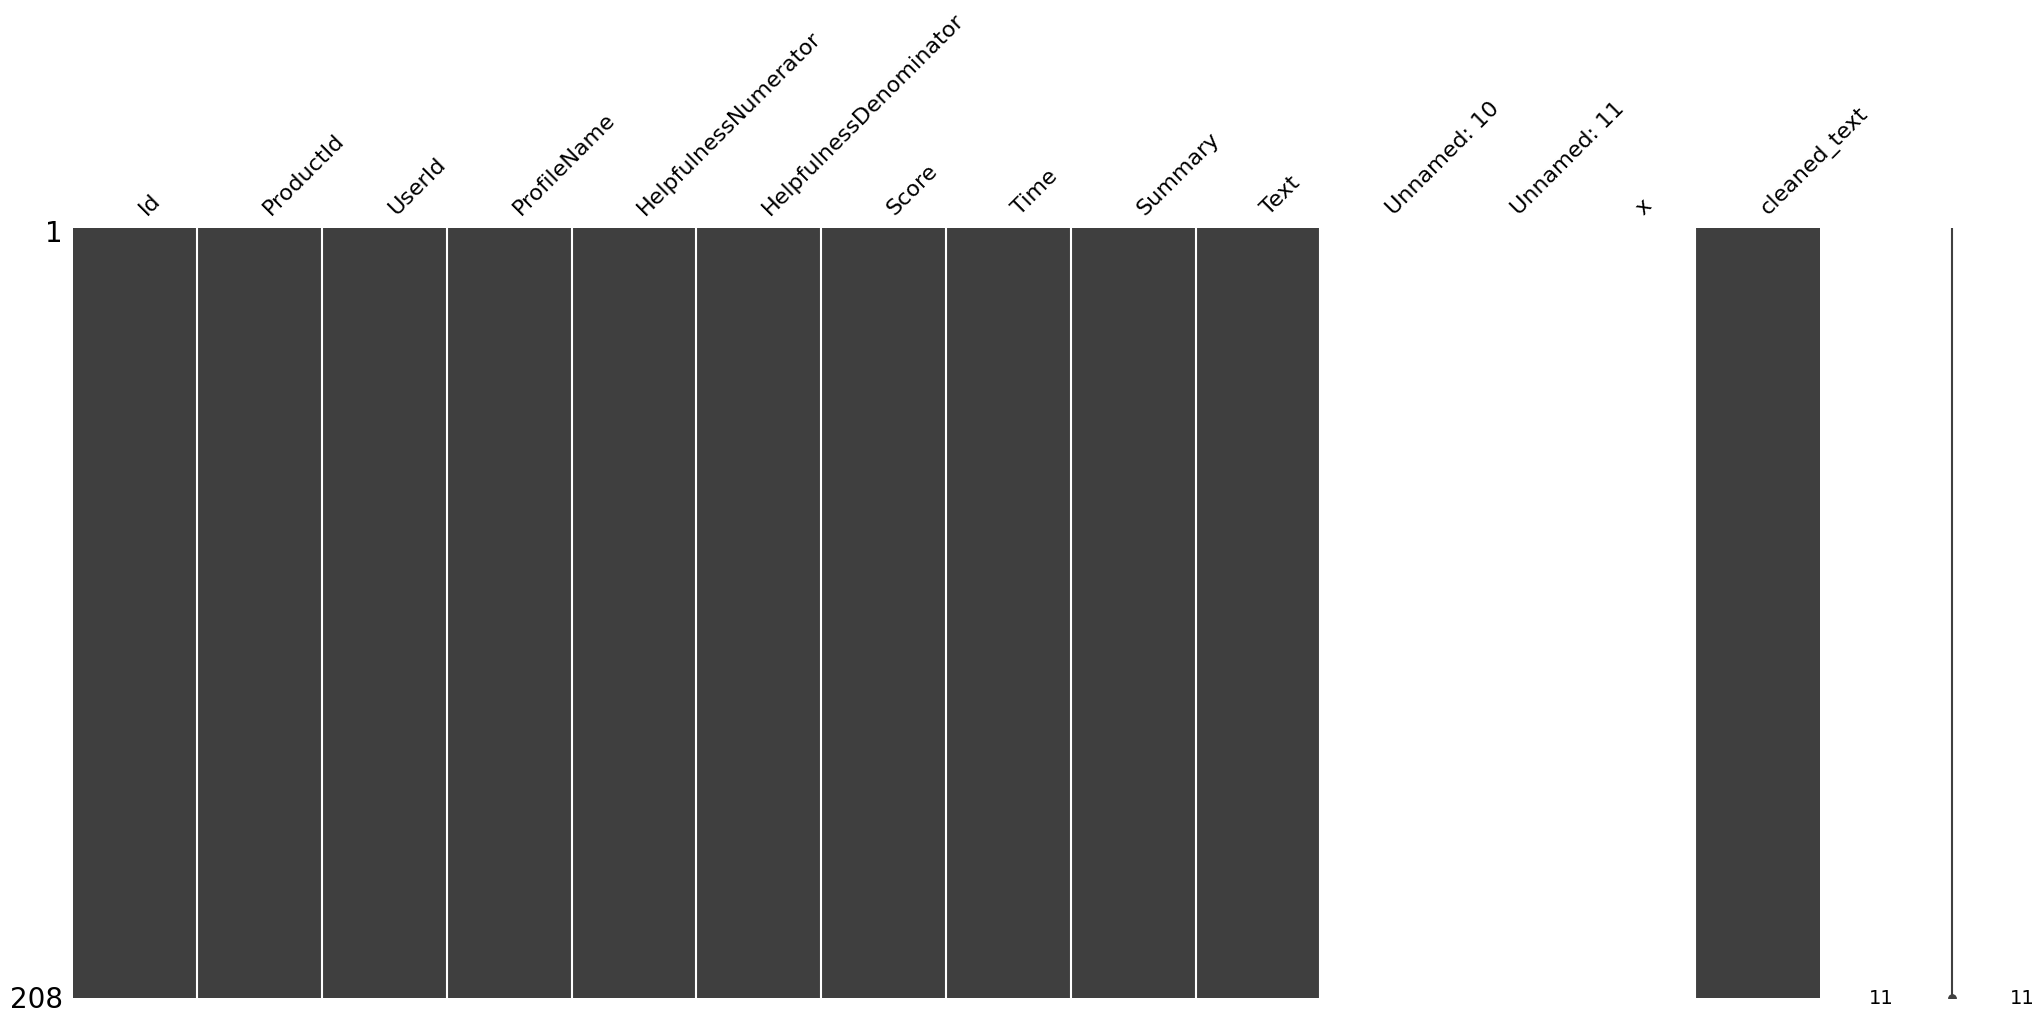

,0
Id,0
ProductId,0
UserId,0
ProfileName,0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,0
Text,0


In [28]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing values in the dataset
msno.matrix(df)
plt.show()

# Check for missing data summary
df.isnull().sum()


Distribution of Review Scores:

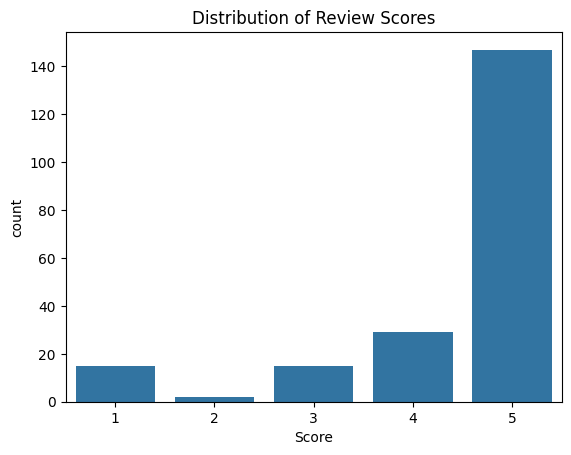

In [29]:
import seaborn as sns

# Plot the distribution of the scores
sns.countplot(x='Score', data=df)
plt.title("Distribution of Review Scores")
plt.show()


 Sentiment Analysis
apply sentiment analysis on the review text to determine whether the reviews are positive, negative, or neutral. This can help better understand customer sentiment.

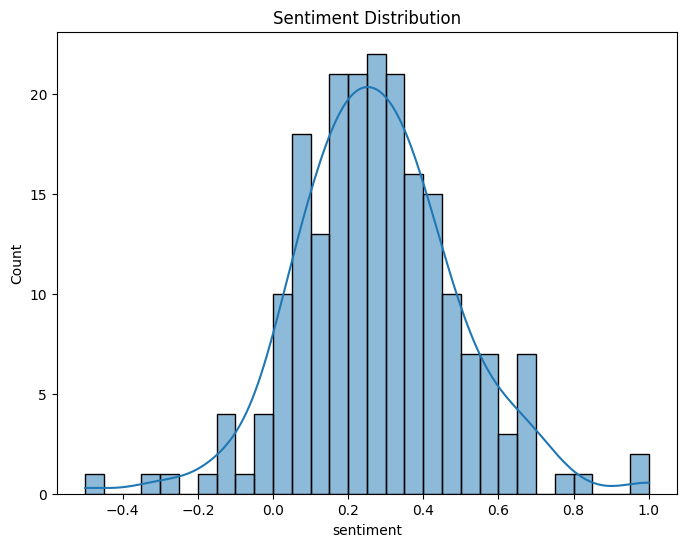

In [30]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to the 'Text' column
df['sentiment'] = df['Text'].apply(get_sentiment)

# Check the sentiment column
df[['Text', 'sentiment']].head()

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title("Sentiment Distribution")
plt.show()


 Word Cloud for Visualization
Generate a word cloud to visualize the most common words in the reviews. This is an intuitive way to understand key themes in the text.

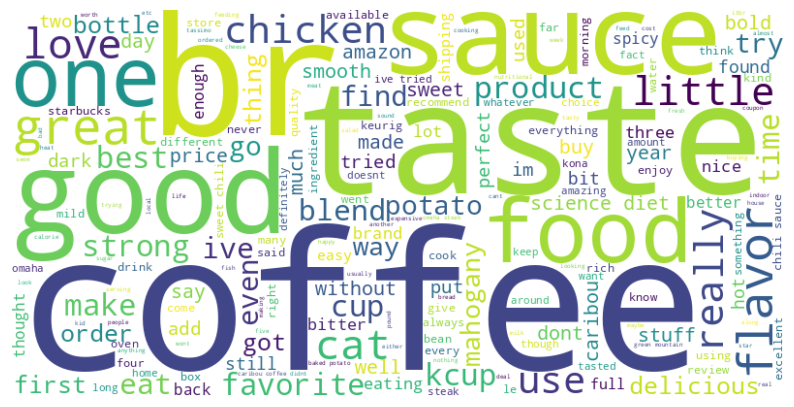

In [31]:
from wordcloud import WordCloud

# Join all the review texts into a single string
all_reviews = ' '.join(df['cleaned_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


 Top N-grams (Bigrams/Trigrams)
Sometimes, frequent pairs or triplets of words (bigrams, trigrams) provide more meaningful insights than individual words.

                Frequency
science diet           23
chili sauce            12
sweet chili            11
green mountain         10
ive tried              10
taste like              9
baked potato            8
omaha steak             8
caribou coffee          8
like strong             7


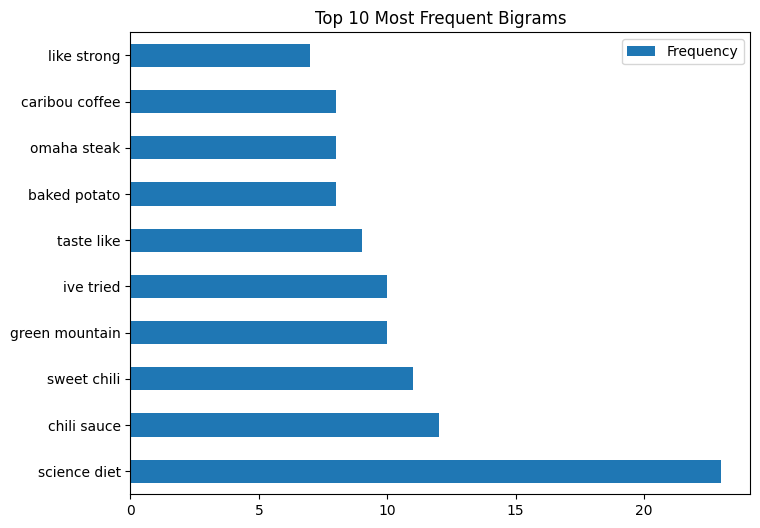

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the text for bigrams (two-word phrases)
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X_bigrams = vectorizer.fit_transform(df['cleaned_text'])

# Sum up the counts of each bigram
bigrams_freq = X_bigrams.sum(axis=0)
bigrams_freq_df = pd.DataFrame(bigrams_freq, columns=vectorizer.get_feature_names_out()).T
bigrams_freq_df.columns = ['Frequency']
bigrams_freq_df = bigrams_freq_df.sort_values('Frequency', ascending=False).head(10)

# Show the most frequent bigrams
print(bigrams_freq_df)

# Plot the bigrams
bigrams_freq_df.plot(kind='barh', figsize=(8, 6))
plt.title("Top 10 Most Frequent Bigrams")
plt.show()


 Topic Modeling (LDA)
Latent Dirichlet Allocation (LDA) can help uncover hidden topics within the reviews.

In [33]:
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_lda = vectorizer.fit_transform(df['cleaned_text'])

# Build LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_lda)

# Display topics
for i, topic in enumerate(lda.components_):
    print(f"Top 10 words for topic #{i}:")
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])
    print("\n")


Top 10 words for topic #0:
['use', 'bottle', 'like', 'taste', 'good', 'love', 'chicken', 'sweet', 'great', 'sauce']


Top 10 words for topic #1:
['oven', 'box', 'cat', 'order', 'good', 'steak', 'food', 'omaha', 'br', 'potato']


Top 10 words for topic #2:
['really', 'year', 'got', 'little', 'thing', 'cat', 'day', 'eating', 'br', 'food']


Top 10 words for topic #3:
['tried', 'caribou', 'good', 'favorite', 'cup', 'taste', 'strong', 'like', 'flavor', 'coffee']


Top 10 words for topic #4:
['kidney', 'nutritional', 'roast', 'taste', 'like', 'br', 'food', 'cat', 'kcup', 'dark']




 TF-IDF Vectorization
Term Frequency-Inverse Document Frequency (TF-IDF) helps highlight important words in the text. It is another useful method for transforming text into numerical vectors.

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = tfidf.fit_transform(df['cleaned_text'])

# View the TF-IDF matrix
print(X_tfidf.toarray())


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [22]:
# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define a function to clean text
def clean_text(text):
    # Remove URLs and special characters
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)

    # Remove punctuations and convert to lower case
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()

    # Tokenize and remove stopwords, then lemmatize
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join tokens back into a string
    return ' '.join(tokens)

# Apply cleaning to the text column
df['cleaned_text'] = df['Text'].apply(lambda x: clean_text(str(x)))

# Check the cleaned text
df[['Text', 'cleaned_text']].head()


,Text,cleaned_text
0,"The mouth says, ""How do I love thee, let me co...",mouth say love thee let count waysbr like appl...
1,Arrived slightly thawed. My parents wouldn't a...,arrived slightly thawed parent wouldnt accept ...
2,The crust on these tarts are perfect. My husb...,crust tart perfect husband love im crazy sourt...
3,These are absolutely scrumptuous! My husband ...,absolutely scrumptuous husband love however an...
4,What a nice alternative to an apple pie. Love ...,nice alternative apple pie love fact slicing d...


In [23]:
# Initialize the CountVectorizer for Bag of Words
bow_vectorizer = CountVectorizer(max_features=1000)  # Limiting to top 1000 words
bow_vectors = bow_vectorizer.fit_transform(df['cleaned_text'])

# Convert to DataFrame
bow_df = pd.DataFrame(bow_vectors.toarray(), columns=bow_vectorizer.get_feature_names_out())
bow_df.head()


,10,100,12,15,185,19,20,2125,24,24counta,...,would,wouldnt,wow,year,yes,yet,youll,youre,yum,zing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_vectors = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.head()


,10,100,12,15,185,19,20,2125,24,24counta,...,would,wouldnt,wow,year,yes,yet,youll,youre,yum,zing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.42223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Initialize LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda_topics = lda_model.fit_transform(bow_vectors)

# Display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display the top 10 words in each topic
no_top_words = 10
display_topics(lda_model, bow_vectorizer.get_feature_names_out(), no_top_words)


Topic 1:
food cat br eating day thing would science diet one
Topic 2:
sauce br great love bottle good use flavor chicken food
Topic 3:
coffee taste like flavor strong cup caribou dark one ive
Topic 4:
sauce use great get make potato pineapple bit love cook
Topic 5:
sauce like good potato sweet chicken one product great taste


In [26]:
# Initialize NMF model
nmf_model = NMF(n_components=5, random_state=42)  # 5 topics
nmf_topics = nmf_model.fit_transform(tfidf_vectors)

# Display topics for NMF
display_topics(nmf_model, tfidf_vectorizer.get_feature_names_out(), no_top_words)


Topic 1:
coffee like taste strong caribou bold mahogany dark kcup smooth
Topic 2:
sauce sweet chicken spicy hot great chili love use bottle
Topic 3:
cat food br diet science eat one minced eating would
Topic 4:
potato steak easy good omaha love oven great make baked
Topic 5:
flavor favorite get cup one available tassimo amazon kona blend


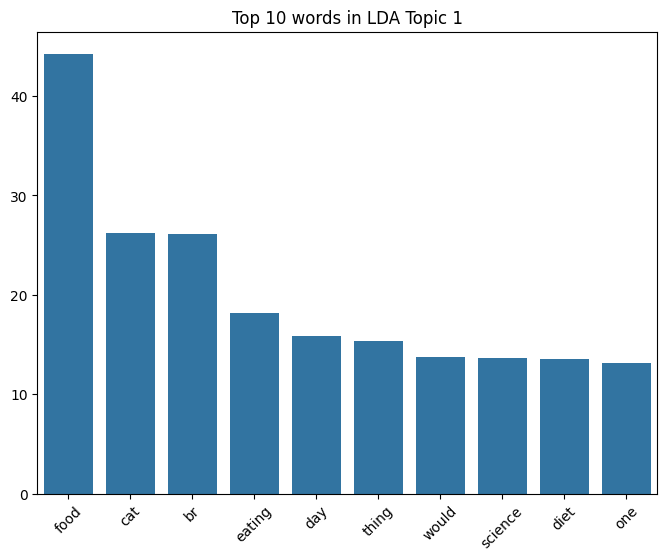

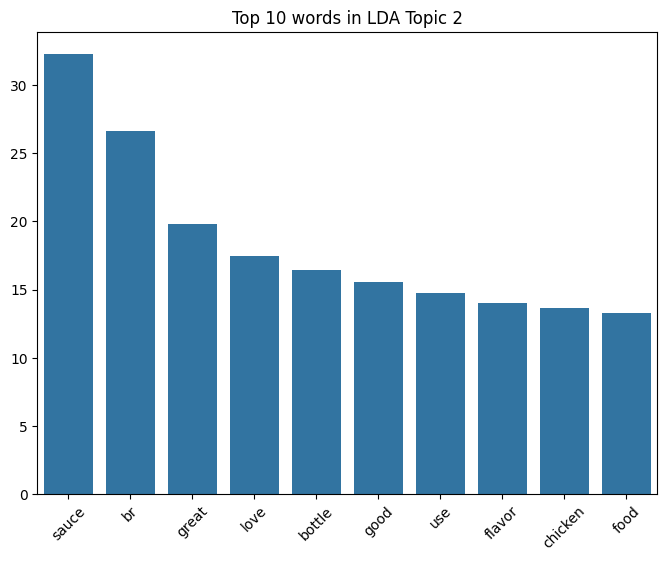

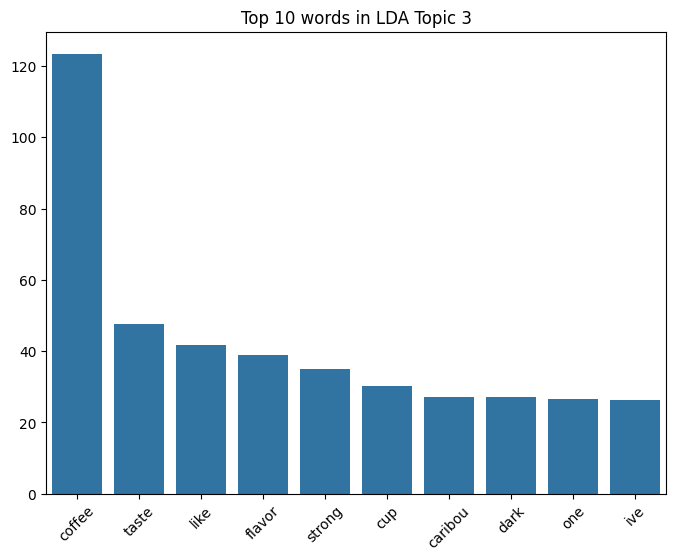

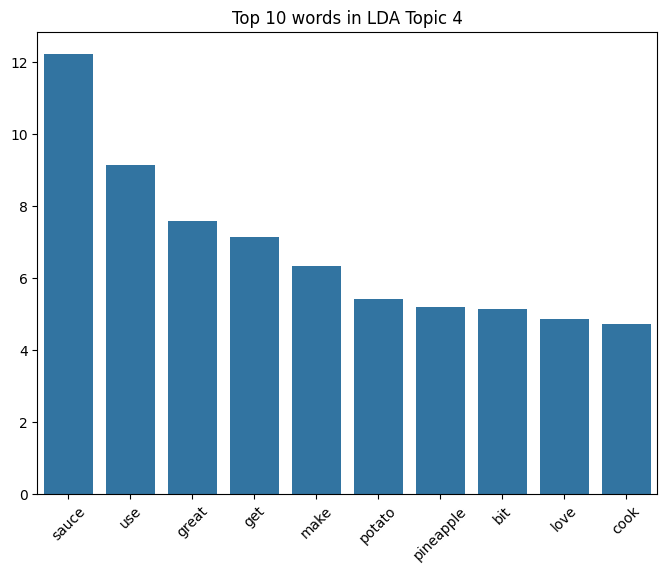

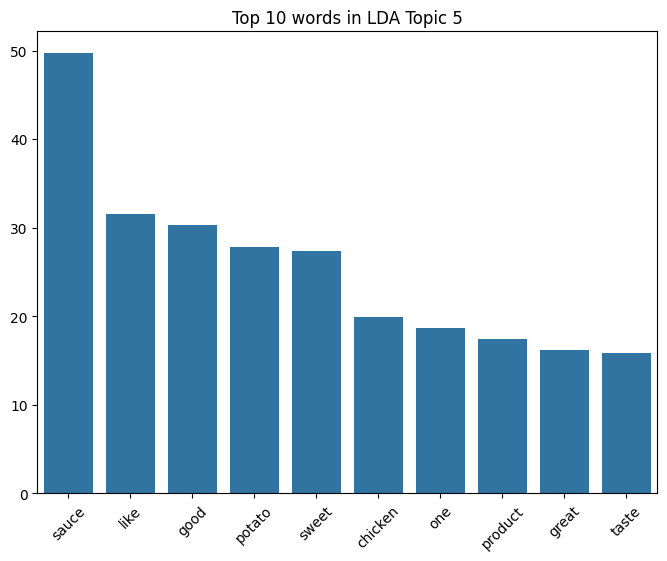

In [27]:
# Visualize the LDA topics
for topic_idx, topic in enumerate(lda_model.components_):
    top_words = [bow_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]]
    plt.figure(figsize=(8, 6))
    sns.barplot(x=top_words, y=topic[topic.argsort()[:-11:-1]])
    plt.title(f"Top 10 words in LDA Topic {topic_idx+1}")
    plt.xticks(rotation=45)
    plt.show()
